In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data=fetch_openml(name='boston', as_frame=True)
df=data.frame

C:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
if 'MEDV' in df.columns:
    df.rename(columns={'MEDV':'medv'},inplace=True)

In [5]:
x=df.drop(columns=['medv'])
y=df['medv']

In [6]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=model.predict(x_test)

In [12]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [13]:
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'r2 score: {r2}')

mae: 3.1890919658878496
mse: 24.29111947497352
rmse: 4.928602182665337
r2 score: 0.668759493535632


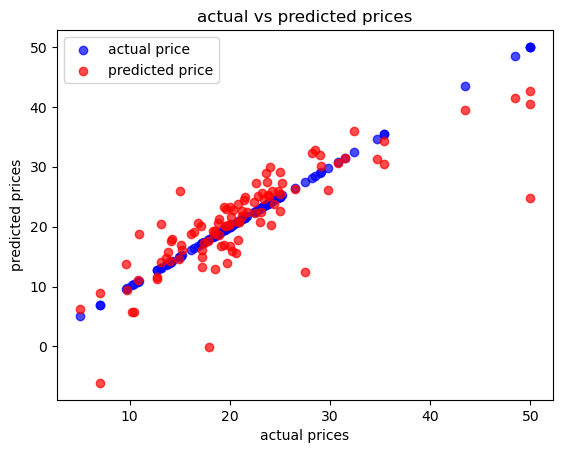

In [16]:
plt.scatter(y_test,y_test,color='blue',alpha=0.7,label='actual price')
plt.scatter(y_test,y_pred,color='red',alpha=0.7,label='predicted price')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual vs predicted prices')
plt.legend()
plt.show()